In [1]:
import os
os.getcwd()



'd:\\satellite-altimetry-course'

### Jason-3数据处理

安装pyrsimg：（1）需先安装gdal      
conda install gdal   
pip install pyrsimg   


In [2]:
from pyrsimg import readTiff, imgShow  


In [3]:
import numpy as np
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt


In [4]:
path_ja3 = 'data/radar/JA3_GPN_2PfP106_216_20190101_232013_20190102_001626.nc'


In [5]:
## 1. jason altimetry data
ja3 = nc.Dataset(path_ja3)



In [6]:
### 属性信息
print(ja3)


<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.7
    title: GDR - Standard dataset
    source: Processing Baseline F v1.01
    contact: CNES aviso@altimetry.fr, EUMETSAT ops@eumetsat.int, NOAA NODC.services@noaa.gov
    reference_document: Jason-3 Products Handbook, SALP-MU-M-OP-16118-CN
    mission_name: Jason-3
    altimeter_sensor_name: Poseidon-3B
    radiometer_sensor_name: AMR
    doris_sensor_name: DGXX-S
    gpsr_sensor_name: GPSP
    institution: CNES
    history: 2021-02-27 07:35:50 : Creation
    references: L1 library=V5.5p1, L2 library=V6.5p1p2, Processing Pilot=V5-8p1p2
    processing_center: SALP
    acq_station_name: CNES
    cycle_number: 106
    absolute_rev_number: 13827
    pass_number: 216
    absolute_pass_number: 26886
    equator_time: 2019-01-01 23:48:19.481000
    equator_longitude: 112.69
    first_meas_time: 2019-01-01 23:20:13.274132
    last_meas_time: 2019-01-02 00:16:25.656125
    xref_altimeter_charact

In [7]:
### 变量信息
list(ja3['data_20/ku'].variables.keys())


['range_ocean',
 'range_ocean_compression_qual',
 'range_ocean_mle3',
 'range_ocean_mle3_compression_qual',
 'range_adaptive',
 'range_adaptive_compression_qual',
 'swh_ocean',
 'swh_ocean_compression_qual',
 'swh_ocean_mle3',
 'swh_ocean_mle3_compression_qual',
 'swh_adaptive',
 'swh_adaptive_compression_qual',
 'sig0_ocean',
 'sig0_ocean_compression_qual',
 'sig0_ocean_mle3',
 'sig0_ocean_mle3_compression_qual',
 'sig0_adaptive',
 'sig0_adaptive_compression_qual',
 'off_nadir_angle_wf_ocean',
 'off_nadir_angle_wf_ocean_compression_qual',
 'num_iterations_ocean',
 'num_iterations_ocean_mle3',
 'num_iterations_adaptive',
 'range_ocog',
 'sig0_ocog',
 'ocog_qual',
 'mqe_ocean',
 'mqe_ocean_mle3',
 'mqe_adaptive',
 'peakiness',
 'wvf_main_class']

#### 查看卫星轨迹


In [8]:
lat_20hz_ja3, lon_20hz_ja3 = ja3['data_20/latitude'][:], ja3['data_20/longitude'][:]


Text(0.5, 1.0, 'jason-3')

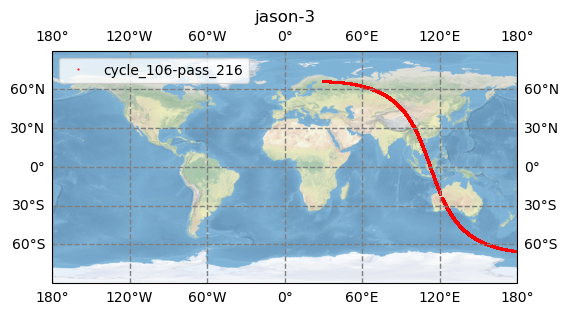

In [9]:
proj = ccrs.PlateCarree(central_longitude=0.0)
fig = plt.figure(figsize=(6, 6))
orbit_ja3 = 'cycle_'+str(ja3.cycle_number)+'-pass_'+str(ja3.pass_number)
## jason-3
ax3 = fig.add_subplot(111, projection=proj);
ax3.stock_img()
ax3.plot(lon_20hz_ja3, lat_20hz_ja3, marker='.', markersize=1,
                                linewidth=0.0, label=orbit_ja3, color='red')
ax3.gridlines(draw_labels=True, linewidth=1, color='gray', linestyle='--')
ax3.legend();
plt.title('jason-3')


In [10]:
## 2. remote sensing image
path_rsimg = 'data/rsimg/s2_yangzonghai_20200511_wgs84.tif'
rsimg = readTiff(path_rsimg)


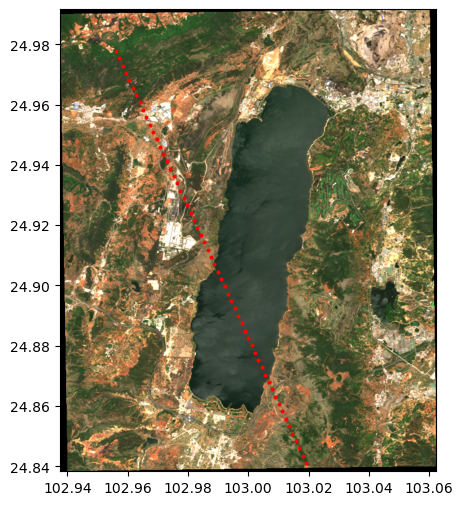

: 

In [ ]:
ids = np.where((lat_20hz_ja3>24.84) & (lat_20hz_ja3<24.98))
fig = plt.figure(figsize=(6, 6))
imgShow(rsimg.array, extent=rsimg.geoextent)
plt.scatter(x=lon_20hz_ja3[ids], y=lat_20hz_ja3[ids], s=3.5, color='red')  ## jason data
